| Package Dependencies | version | 
|------|------|
|  numpy            |         1.17.5            | 
|  pandas           |         1.0.5  |
|  seaborn           |        0.11.2  | 
|  clustalw             |      2.1   | 
|  bokeh          |           2.4.3          | 
|  biopython      |           1.7            | 
|  matplotlib       |          3.2.2           | 


| File Dependencies | download link| md5sum | 
|------|------|------|
|  211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta.gz    |  https://projects.au.dk/fileadmin/projects/fabagenome/211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta.gz            |  35f6201a63c9dad049c060477f64bbfa             | 
|  HEDIN_TMP5.check.renamed.phase.complete_CDS.fa           |         https://projects.au.dk/fileadmin/ingen_mappe_valgt/HEDIN_TMP5.check.renamed.phase.complete_CDS.fa  |ced3cc7c446dcb0d5a974213e42e4a23   |
|  HEDIN_TMP5.check.renamed.phase.complete.gff3           |        https://projects.au.dk/fileadmin/ingen_mappe_valgt/HEDIN_TMP5.check.renamed.phase.complete.gff3    | fdd7c3bd28f23f6544f997256ef4736a    | 


#### Where is VC1 in Hedin/2? 
> Blast known Hedin/2 VC1 cDNA sequence from supplementary_data_6.docx against Hedin/2 assembly and complete CDS annotation  

- create blastdb for 211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta.gz, Supplementary_Data_1 and HEDIN_TMP5.check.renamed.phase.complete_CDS.fa in command line:  

`ex.) makeblastdb -in 211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta.gz -dbtype nucl -parse_seqids -out Hedin_asm`

`ex.) makeblastdb -in HEDIN_TMP5.check.renamed.phase.complete_CDS.fa -dbtype nucl -parse_seqids -out Hedin_CDS`  

`ex.) makeblastdb -in Supplementary_Data_1.fa -dbtype nucl -parse_seqids -out Hedin_supp`

In [3]:
#my conda environment where packages are installed = "blast"
#my python kernel for jupyter notebook = "blast(python 3.8.5)"

# Show plots as part of the notebook (this is a Jupyter-specific operation)
%matplotlib inline
import matplotlib.pyplot as plt

# Standard library packages
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

# Import Biopython tools for running BLASTn locally
from Bio.Blast.Applications import NcbiblastnCommandline

##### get VC1 (evg_1250620) from the transcript assemblies 

In [8]:
#create commandline for blastn -> find VC1 from the transcript assemblies
blastn_Hedin_supp = NcbiblastnCommandline (query='VC1_cDNA_Hedin.fa', out='VC1_cDNA_Hedin_supp_blastout.txt', outfmt=6, db='Hedin_supp')
print(blastn_Hedin_supp) #check what the command line looks like 
# Run BLASTn, and print STDOUT/STDERR
stdout_Hedin_supp, stderr_Hedin_supp = blastn_Hedin_supp()

# Check STDOUT, STDERR - if it  ran with no errors, we should see nothing print for the stdout and error
print("STDOUT: %s" % stdout_Hedin_supp)
print("STDERR: %s" % stderr_Hedin_supp)

blastn -out VC1_cDNA_Hedin_supp_blastout.txt -outfmt 6 -query VC1_cDNA_Hedin.fa -db Hedin_supp
STDOUT: 
STDERR: 


In [4]:
# Read BLASTn output
results_Hedin_supp= pd.read_csv('VC1_cDNA_Hedin_supp_blastout.txt', sep="\t", header=None)

# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results_Hedin_supp.columns = headers

# Inspect modified table
results_Hedin_supp.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,VC1_cDNA_Hedin,evgLocus_1250620,100.000,1509,0,0,36,1544,1,1509,0.000000e+00,2787
1,VC1_cDNA_Hedin,evgLocus_1250615,92.759,1312,87,4,272,1575,246,1557,0.000000e+00,1890
2,VC1_cDNA_Hedin,evgLocus_1250615,100.000,87,0,0,92,178,48,134,1.230000e-38,161
3,VC1_cDNA_Hedin,evgLocus_1029397,83.955,1234,196,2,276,1508,316,1548,0.000000e+00,1181


##### Where is VC1 in the assembly?

In [ ]:
####Warning can't run this blast localy bc my PC doesn't have enough resources
#create commandline for blastn -> where is it in the assembly
#blastn_Hedin_asm = NcbiblastnCommandline (query='VC1_cDNA_Hedin.fa', out='VC1_cDNA_Hedin_asm_blastout.txt', outfmt=6, db='Hedin_asm')
#print(blastn_Hedin_asm) #check what the command line looks like 
# Run BLASTn, and print STDOUT/STDERR
#stdout_Hedin_asm, stderr_Hedin_asm = blastn_Hedin_asm()

# Check STDOUT, STDERR - if it  ran with no errors, we should see nothing print for the stdout and error
#print("STDOUT: %s" % stdout_Hedin_asm)
#print("STDERR: %s" % stderr_Hedin_asm)

In [5]:
# Read BLASTn output
results_Hedin_asm = pd.read_csv('VC1_cDNA_Hedin_asm_blastout.txt', sep="\t", header=None)

# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results_Hedin_asm.columns = headers

# Inspect modified table
#results_Hedin_asm.head()
#pull out only the top hits
top_results_Hedin_asm=results_Hedin_asm.drop(results_Hedin_asm[results_Hedin_asm['pc_identity'] < 95].index)
top_results_Hedin_asm

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,VC1_cDNA_Hedin,chr1L,100.000,324,0,0,578,901,1759262264,1759262587,6.570000e-168,599.0
1,VC1_cDNA_Hedin,chr1L,99.694,327,1,0,578,904,1759538256,1759537930,6.570000e-168,599.0
2,VC1_cDNA_Hedin,chr1L,99.694,327,1,0,578,904,1760110865,1760110539,6.570000e-168,599.0
3,VC1_cDNA_Hedin,chr1L,100.000,299,0,0,1030,1328,1759262948,1759263246,5.190000e-154,553.0
4,VC1_cDNA_Hedin,chr1L,100.000,299,0,0,1030,1328,1759537572,1759537274,5.190000e-154,553.0


#### There's introns...lets use  a splice aware aligner instead
`minimap2 -x splice VC1_cDNA_Hedin.fa 211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta -o VC1_cDNA_Hedin_minimap_asm.paf` 

###### splice:	Long-read spliced alignment (-k15 -w5 --splice -g2k -G200k -A1 -B2 -O2,32 -E1,0 -b0 -C9 -z200 -ub --junc-bonus=9 --cap-sw-mem=0 --splice-flank=yes). In the splice mode, 1) long deletions are taken as introns and represented as the ‘N’ CIGAR operator; 2) long insertions are disabled; 3) deletion and insertion gap costs are different during chaining; 4) the computation of the ‘ms’ tag ignores introns to demote hits to pseudogenes.


In [117]:
#parse PAF file
Hedin_minimap = pd.read_csv('VC1_cDNA_Hedin_minimap_asm.paf', sep="\t", header=None)
Hedin_minimap
# Define column headers
headers = ['query_name', 'query_len',
           'query_start', 'query_end', 'strand', 'target_name',
           'target_len', 'target_start', 'target_end', 'residue_match',
           'aln_len', 'mapq']

# Assign headers
Hedin_minimap.columns = headers

ValueError: Length mismatch: Expected axis has 18 elements, new values have 12 elements

##### looks like there are some partial hits on  chr1S,chr6, contig_8341

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,VC1_cDNA_Hedin,chr1L,100.000,324,0,0,578,901,1759262264,1759262587,6.570000e-168,599.0
1,VC1_cDNA_Hedin,chr1L,99.694,327,1,0,578,904,1759538256,1759537930,6.570000e-168,599.0
2,VC1_cDNA_Hedin,chr1L,99.694,327,1,0,578,904,1760110865,1760110539,6.570000e-168,599.0
3,VC1_cDNA_Hedin,chr1L,100.000,299,0,0,1030,1328,1759262948,1759263246,5.190000e-154,553.0
4,VC1_cDNA_Hedin,chr1L,100.000,299,0,0,1030,1328,1759537572,1759537274,5.190000e-154,553.0
5,VC1_cDNA_Hedin,chr1L,100.000,299,0,0,1030,1328,1760110181,1760109883,5.190000e-154,553.0
6,VC1_cDNA_Hedin,chr1L,99.627,268,1,0,94,361,1759261491,1759261758,4.120000e-135,490.0
7,VC1_cDNA_Hedin,chr1L,99.627,268,1,0,94,361,1759539029,1759538762,4.120000e-135,490.0
8,VC1_cDNA_Hedin,chr1L,99.627,268,1,0,94,361,1760111638,1760111371,4.120000e-135,490.0
9,VC1_cDNA_Hedin,chr1L,100.000,253,0,0,1326,1578,1759263339,1759263591,1.930000e-128,468.0


#### pull out sequences from assembly's top hits

In [114]:
import pysam
genome = pysam.Fastafile('211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta')
sequence = genome.fetch('chr1L', 1759262264, 1759262587	)
sequence


'GATGCTAAACATGGTACCACCACAGGGGTGTCAGCTCATGACAGGGCAGCTACTGTCTTGGCACTTGCATCTAGAGGTTCAACTCCGGCTGATTTCAACCGACCAGGCCATATTTTCCCAGTAAAATACACTGAAGGTGGTGTCTTAAAGAGAGCCGGACACACAGAAGCTTCAGTCGATCTTACCGTACTTGCTGGTTTGGATCCGGTGTCAGTTCAGTGTGAGATTGTTGATGAAGATGGTTCCATGGCTAGATTGCCTAAGCTTCGCCAGTTTGCCAAGCGTGAGAATTTGAAAATTGTATCTATTGCTGACTTGATAAG'

In [ ]:
##pull out sequences for asm tophits

211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta.gz
from Bio import SeqIO                                                               
import sys   

#create a list of subject IDs for top hits
top_results_Hedin_CDS_subjectID=top_results_Hedin_CDS['subject'].tolist()
top_results_Hedin_CDS_subjectID
                                        
#read in Hedin/2 CDS annotation                                                                                    
Hedin_CDS = SeqIO.parse("./faba_genome_paper/HEDIN_TMP5.check.renamed.phase.complete_CDS.fa", 'fasta')                                    
with open("top_results_Hedin_CDS_subjectID.fasta", "w") as output_handle:
    SeqIO.write((seq for seq in Hedin_CDS if seq.id in top_results_Hedin_CDS_subjectID), output_handle, "fasta")

##### Which gene-models are VC1 in the annotation?

In [ ]:

#create commandline for blastn -> which gene models in the annotation?
blastn_Hedin_CDS = NcbiblastnCommandline (query='VC1_cDNA_Hedin.fa', out='VC1_cDNA_Hedin_cds_blastout.txt', outfmt=6, db='Hedin_CDS')
print(blastn_Hedin_CDS) #check what the command line looks like 
# Run BLASTn, and print STDOUT/STDERR
stdout_Hedin_CDS, stderr_Hedin_CDS = blastn_Hedin_CDS()

# Check STDOUT, STDERR - if it  ran with no errors, we should see nothing print for the stdout and error
print("STDOUT: %s" % stdout_Hedin_CDS)
print("STDERR: %s" % stderr_Hedin_CDS)


blastn -out VC1_cDNA_Hedin_cds_blastout.txt -outfmt 6 -query VC1_cDNA_Hedin.fa -db Hedin_CDS


In [7]:
# Read BLASTn output
results_Hedin_CDS = pd.read_csv('VC1_cDNA_Hedin_cds_blastout.txt', sep="\t", header=None)

# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results_Hedin_CDS.columns = headers

# Inspect modified table
results_Hedin_CDS.head()


,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485560.1,100.00,1509,0,0,36,1544,1,1509,0.000000e+00,2787
1,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485520.1,100.00,1509,0,0,36,1544,1,1509,0.000000e+00,2787
2,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485480.1,100.00,1509,0,0,36,1544,1,1509,0.000000e+00,2787
3,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.Ung108560.1,92.53,1312,90,4,272,1575,246,1557,0.000000e+00,1873
4,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.Ung108560.1,100.00,87,0,0,92,178,48,134,1.300000e-38,161


##### It look like there are 3 copies of VC1 in Hedin/2 

In [8]:
#pull out only the top hits
top_results_Hedin_CDS=results_Hedin_CDS.drop(results_Hedin_CDS[results_Hedin_CDS['pc_identity'] < 95].index).drop(results_Hedin_CDS[results_Hedin_CDS['aln_length'] < 1000].index)
top_results_Hedin_CDS

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485560.1,100.0,1509,0,0,36,1544,1,1509,0.0,2787
1,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485520.1,100.0,1509,0,0,36,1544,1,1509,0.0,2787
2,VC1_cDNA_Hedin,Vfaba.Hedin2.R1.1g485480.1,100.0,1509,0,0,36,1544,1,1509,0.0,2787


#### duplicates? 


> Quick check: look for gene models in genome browser 
>> tandem

<img src="Vfaba.Hedin2.R1.1g485480.1_genemodel.png" />
<img src="Vfaba.Hedin2.R1.1g485520.1_genemodel.png" />
<img src="Vfaba.Hedin2.R1.1g485560.1_genemodel.png" />

#### Read Hedin2 gff3

In [10]:
# Read Hedin2 gff3
headers=['seqid', 'source', 'type', 'start', 'end', 'score ', 'strand', 'phase', 'attributes']
Hedin_gff3 = pd.read_table('HEDIN_TMP5.check.renamed.phase.complete.gff3', comment='#', sep="\t", names=headers)
  

#### find VC1 gene models in annotation

In [20]:
#find gene models in annotation
#create a list of subject IDs for top hits
top_results_Hedin_CDS_subjectID=top_results_Hedin_CDS['subject'].tolist()
top_results_Hedin_CDS_subjectID

#create a mask for the annotation dataframe using a regex (|) from the list of gene model names
mask=Hedin_gff3["attributes"].str.contains('|'.join(top_results_Hedin_CDS_subjectID)) 
Hedin_gff3_topresults=Hedin_gff3[mask] #apply mask
Hedin_gff3_topresults


,seqid,source,type,start,end,score,strand,phase,attributes
72519,chr1L,Liftoff,mRNA,1759261218,1759263557,.,+,.,ID=Vfaba.Hedin2.R1.1g485480.1;Parent=Vfaba.Hed...
72520,chr1L,Liftoff,exon,1759261218,1759261276,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72521,chr1L,Liftoff,exon,1759261492,1759261753,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72522,chr1L,Liftoff,exon,1759261835,1759262056,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72523,chr1L,Liftoff,exon,1759262265,1759262587,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72524,chr1L,Liftoff,exon,1759262751,1759262880,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72525,chr1L,Liftoff,exon,1759262950,1759263246,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72526,chr1L,Liftoff,exon,1759263342,1759263557,.,+,.,Parent=Vfaba.Hedin2.R1.1g485480.1
72527,chr1L,Liftoff,CDS,1759261218,1759261276,.,+,0,Parent=Vfaba.Hedin2.R1.1g485480.1
72528,chr1L,Liftoff,CDS,1759261492,1759261753,.,+,1,Parent=Vfaba.Hedin2.R1.1g485480.1


#### Run interproscan and parse XML for functional domains

#### visualize VC1 homologs -> Developing

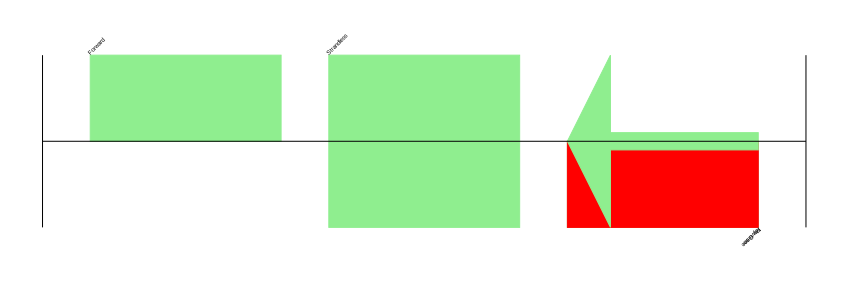

In [59]:
from IPython.core.display import SVG

#from reportlab.graphics import renderPM
from reportlab.lib import colors
from reportlab.lib.units import cm

from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation


gdd = GenomeDiagram.Diagram('Test Diagram')
gdt_features = gdd.new_track(1, greytrack=False)
gds_features = gdt_features.new_set()

#Add three features to show the strand options,
feature = SeqFeature(FeatureLocation(25, 125), strand=+1)
gds_features.add_feature(feature, name="Forward", label=True)
feature = SeqFeature(FeatureLocation(150, 250), strand=None)
gds_features.add_feature(feature, name="Strandless", label=True)
feature = SeqFeature(FeatureLocation(275, 375), strand=-1)
gds_features.add_feature(feature, name="Reverse", label=True)
gds_features.add_feature(feature, color="red", label=True, name="My Gene")


#gds_features.add_feature(feature,  sigil="BOX")
#gds_features.add_feature(feature,  sigil="ARROW")
#gds_features.add_feature(feature,  sigil="OCTO")
#gds_features.add_feature(feature,  sigil="JAGGY")
#gds_features.add_feature(feature,  sigil="BIGARROW")
gds_features.add_feature(feature,  sigil="BIGARROW",arrowshaft_height=0.1,arrowhead_length=0.25)


gdd.draw(format='linear', pagesize=(30*cm,10*cm), fragments=1,
         start=0, end=400)
gdd.write("GD_labels_default.svg", "svg")
SVG("GD_labels_default.svg")

In [90]:
#convert fasta files to genebank
from Bio import SeqIO

input_handle = open("top_results_Hedin_CDS_subjectID.fasta", "r")
output_handle = open("test.gb", "w")
sequences = list(SeqIO.parse(input_handle, "fasta"))
#asign generic_dna or generic_protein
for seq in sequences:
  seq.annotations['molecule_type'] = 'DNA'

count = SeqIO.write(sequences, output_handle, "genbank")

output_handle.close()
input_handle.close()
print("Coverted %i records" % count)



Coverted 3 records


In [103]:
for record in SeqIO.parse("test.gb", "genbank"):
    print(record.seq)

ATGGCAGCTGCTACTTTCAATCTCTCTTCTTCCTCCTCAAAGCCACTCTCATCTTCCCGGCTATCCAACCACTTCAAAATTTTCAATGATTTACCTCCTGCGAGACTCAATTATAAATTTGCTTCAACTCATAATGCTGCTTTTAAGGTTAAAGCTGCATTGGTATCTGGAGGGGGTAAAGATCTGGCTGTTGTTGATGAATCCAAGTCGGGGATAACAAACCTTGTTTTCCATGTTGACAACAATGAATTTGATTTGGACAGTCCTGCAGAAGGTTTCGCTTCTATCCCTGAAGCCATTGAAGACATTCGCCAGGGAAAGATGGTAGTAGTTGTAGACGATGAAGACAGAGAAAATGAAGGAGACTTGATAATGGCAGCACAGTTGGCAACACCCGAAGCTATGGCTTTTATAGTGAAGCATGGAAGTGGCATAGTTTGTGTAAGCATGAAAGAGGAAGATCTTGATAGATTGGAACTTCCTTTGATGGTGGACAGTAAAGCTAATGCGCAAAAACATTGTACCGCATTCACTGTGTCAGTGGATGCTAAACATGGTACCACCACAGGGGTGTCAGCTCATGACAGGGCAGCTACTGTCTTGGCACTTGCATCTAGAGGTTCAACTCCGGCTGATTTCAACCGACCAGGCCATATTTTCCCAGTAAAATACACTGAAGGTGGTGTCTTAAAGAGAGCCGGACACACAGAAGCTTCAGTCGATCTTACCGTACTTGCTGGTTTGGATCCGGTGTCAGTTCAGTGTGAGATTGTTGATGAAGATGGTTCCATGGCTAGATTGCCTAAGCTTCGCCAGTTTGCCAAGCGTGAGAATTTGAAAATTGTATCTATTGCTGACTTGATAAGATATAGAAGAAAGAGAGACATATTAATAGAACGCTCTTCTGCTGCAAGATTACCTACTCAGTGGGGGAAATTCACATCATATTGTTATAAGTCTCTCTTAGACGGGATTGAGCATATTGCAATGGTTAAGGGTG

Vfaba.Hedin2.R1.1g485480.1
Vfaba.Hedin2.R1.1g485520.1
Vfaba.Hedin2.R1.1g485560.1


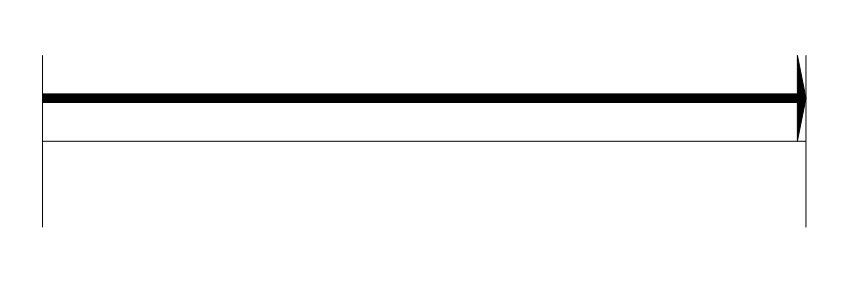

In [112]:
from IPython.core.display import SVG

#from reportlab.graphics import renderPM
from reportlab.lib import colors
from reportlab.lib.units import cm

from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

#records = SeqIO.parse("test.gb", "genbank")


for record in SeqIO.parse("test.gb", "genbank"):
    print(record.id)

    gd_diagram = GenomeDiagram.Diagram(record.id )
    gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
    gd_feature_set = gd_track_for_features.new_set()
    
    feature = SeqFeature(FeatureLocation(0, len(record.seq)), strand=+1) #refer to gff3 to get correct strand info, record.seq should be the dna not cds seq
    gd_feature_set.add_feature(feature, color=colors.black, label=True, sigil="ARROW",arrowshaft_height=0.1,arrowhead_length=0.1)

        
gd_diagram.draw(format='linear', pagesize=(30*cm,10*cm), fragments=1,
         start=0, end=400)
gd_diagram.write("GD_labels_default.svg", "svg")
SVG("GD_labels_default.svg")

###  Multiple Sequence Alignment of VC1 gene models and cDNA
> Are they identical in sequence?

##### Take VC1 sequences from annotation and do a multiple sequence alignment

In [36]:
##pull out sequences for tophits
from Bio import SeqIO                                                               
import sys   

#create a list of subject IDs for top hits
top_results_Hedin_CDS_subjectID=top_results_Hedin_CDS['subject'].tolist()
top_results_Hedin_CDS_subjectID
                                        
#read in Hedin/2 CDS annotation                                                                                    
Hedin_CDS = SeqIO.parse("./faba_genome_paper/HEDIN_TMP5.check.renamed.phase.complete_CDS.fa", 'fasta')                                    
with open("top_results_Hedin_CDS_subjectID.fasta", "w") as output_handle:
    SeqIO.write((seq for seq in Hedin_CDS if seq.id in top_results_Hedin_CDS_subjectID), output_handle, "fasta")

In [15]:
#Setting up some functions for running and visualizing multiple sequencing alignments

def view_alignment(aln, fontsize="9pt", plot_width=800):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the aln object
    seqs = [rec.seq for rec in (aln)]
    ids = [rec.id for rec in aln]    
    text = [i for s in list(seqs) for i in s]
    colors = get_colors(seqs)    
    N = len(seqs[0])
    S = len(seqs)    
    width = .4

    x = np.arange(1,N+1)
    y = np.arange(0,S,1)
    #creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y)
    #flattens the arrays
    gx = xx.ravel()
    gy = yy.flatten()
    #use recty for rect coords with an offset
    recty = gy+.5
    h= 1/S
    #now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
    plot_height = len(seqs)*15+50
    x_range = Range1d(0,N+1, bounds='auto')
    if N>100:
        viewlen=100 
    else:
        viewlen=N
    #view_range is for the close up view
    view_range = (0,viewlen) ######change to view window of interest
    tools="xpan, xwheel_zoom, reset, save"

    #entire sequence view (no text, with zoom)
    p = figure(title=None, plot_width= plot_width, plot_height=50,
               x_range=x_range, y_range=(0,S), tools=tools,
               min_border=0, toolbar_location='below')
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                 line_color=None, fill_alpha=0.8)
    p.add_glyph(source, rects)
    p.yaxis.visible = False
    p.grid.visible = False  

    #sequence text view with ability to scroll along x axis
    p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')#, lod_factor=1)          
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="helvetica",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.6)
    p1.add_glyph(source, glyph)
    p1.add_glyph(source, rects)

    p1.grid.visible = False
    p1.xaxis.major_label_text_font_style = "bold"
    
    
    p1.yaxis.major_label_text_color = "black"
    p1.yaxis.major_label_text_font_style = "bold"
    p1.yaxis.major_label_text_font = "tahoma"

    p1.yaxis.minor_tick_line_width = 0
    p1.yaxis.major_tick_line_width = 0

    p = gridplot([[p],[p1]], toolbar_location='below')
    return p


def get_colors(seqs):
    """make colors for bases in sequence"""
    text = [i for s in list(seqs) for i in s]
    #clrs =  {'A':'green','T':'red','G':'orange','C':'blue','-':'white'}
    clrs =  {'A':'#009E73','T':'#CC79A7','G':'orange','C':'#56B4E9','-':'white'}

    colors = [clrs[i] for i in text]
    return colors

def muscle_alignment(seqs):
    """Align 2 sequences with muscle"""
    filename = 'temp.faa'
    SeqIO.write(seqs, filename, "fasta")
    name = os.path.splitext(filename)[0]
    from Bio.Align.Applications import MuscleCommandline
    cline = MuscleCommandline(input=filename, out=name+'.txt')
    stdout, stderr = cline()
    align = AlignIO.read(name+'.txt', 'fasta')
    return align

def clustal_alignment(seqs):
    """Align multiple sequences present in a single fasta file using clustalW2"""
    in_file = seqs
    out_file = in_file.replace(".fasta", "_aln")
    clustalw_cline = ClustalwCommandline("clustalw2", infile=in_file, outfile=out_file, outorder= 'INPUT')
    # Run clustalw, and catch STDOUT/STDERR
    stdout_clustalw_Hedin_CDS, stderr_clustalw_Hedin_CDS = clustalw_cline() 
    print("Aligned!")


In [ ]:
#combine top hits fasta from cds annotation with query (VC1_cDNA sequence) into a single fasta for a MSA
filenames = ['top_results_Hedin_CDS_subjectID.fasta', 'VC1_cDNA_Hedin.fa']
with open('top_results_Hedin_CDS_subjectID_MSA.fasta', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [16]:
#MSA of top hits using commandline wrapper for clustalw       
from Bio.Align.Applications import ClustalwCommandline
in_file = "top_results_Hedin_CDS_subjectID_MSA.fasta"
out_file = "top_results_Hedin_CDS_subjectID_MSA_aln"
clustalw_cline = ClustalwCommandline("clustalw2", infile=in_file, outfile=out_file)
print(clustalw_cline)


# Run clustalw, and catch STDOUT/STDERR
stdout_clustalw_Hedin_CDS, stderr_clustalw_Hedin_CDS = clustalw_cline()



clustalw2 -infile=top_results_Hedin_CDS_subjectID_MSA.fasta -outfile=top_results_Hedin_CDS_subjectID_MSA_aln


In [17]:
#same as previous cell, just using the clustal_alignment function 
#MSA of top hits using commandline wrapper for clustalw       
clustal_alignment("top_results_Hedin_CDS_subjectID_MSA.fasta")


Aligned!


In [18]:
#Visualize alignment 
import os, io, random
import string
import numpy as np

from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO

import panel as pn
import panel.widgets as pnw
pn.extension()

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot


from Bio import AlignIO
aln = AlignIO.read("top_results_Hedin_CDS_subjectID_MSA_aln", "clustal")
p = view_alignment(aln, plot_width=900)
pn.pane.Bokeh(p)

Bokeh(Column)

# Run Cas-Designer and Cas-Offinder locally to design gRNA and assess potential off targets

##### use Vfaba.Hedin2.R1.1g485480.1.fa to represent CDS for gRNA design


##### Add following line (change the path to the appropriate one): export PATH=$PATH:/path/to/cas-offinder  
##### here we are supposed to specify the path to the folder that has the file in it, do not include the filename
`export PATH="$PATH:/home/jayakod1/OneDriveMSU/Scholarships/JobApps/Aarhus/"`  
`export PATH="/mnt/c/Users/Thila/OneDrive - Michigan State University/Scholarships/JobApps/Aarhus/"`  

##### Add following line again (change the path to the appropriate one):  export PATH=$PATH:/path/to/cas-offinder-bulge  
`export PATH="$PATH:/home/jayakod1/OneDriveMSU/Scholarships/JobApps/Aarhus/"`  
`export PATH="/mnt/c/Users/Thila/OneDrive - Michigan State University/Scholarships/JobApps/Aarhus/"`  



#### create config file for running Cas-Designer

In [1]:
#create config file for cas-designer
with open("Cas-Designer_VC2.config", "w") as outfile:
    #path to target sequence (genome) file in fasta
    target_fasta="/home/jayakod1/OneDriveMSU/Scholarships/JobApps/Aarhus/211010_Vfaba_split_pseudomolecules_hedin_v1pluschlro_clean_unanchored_contigs.fasta"
    #path to inputt sequence file in fasta
    input_fasta="/home/jayakod1/OneDriveMSU/Scholarships/JobApps/Aarhus/Vfaba.Hedin2.R1.1g485480.1.fa"
    #crRNA length (without PAM)
    cRNA_length="20"
    #PAM sequence (for spCas9 = NGG)
    pam1="NGG"
    #PAM pattern in target organism  
    pam2="NGG"
    #mismatch  number
    mismatch = "0"
    #DNA bulge size
    dna_bulge = "2"
    #RNA bulge size
    rna_bulge= "2"

    outfile.write(target_fasta + '\n')
    outfile.write(input_fasta+ '\n')
    outfile.write(cRNA_length+ '\n')
    outfile.write(pam1+ '\n')
    outfile.write(pam2+ '\n')
    outfile.write(mismatch+ '\n')
    outfile.write(dna_bulge+ '\n')
    outfile.write(rna_bulge+ '\n')
outfile.close()


####  cas-designer outputs
| Filename | description | 
|------|------|
|  Cas-Designer_VC1_2-summary.txt            |         sgRNAs and cleavage positions           | 
|  Cas-Designer_VC1_2-mich_patterns.txt           |       microhomology predictions, to avoid unwanted in-frame deletions (score > 66)  |
|  Cas-Designer_VC1_2-dna_bulges.txt           |      considering off target sites with n insertions/deletions (bulges) in DNA   | 
|  Cas-Designer_VC1_2-rna_bulges.txt             |      considering off target sites with n insertions/deletions (bulges) in RNA   | 
|  Cas-Designer_VC1_2-offtargets.txt          |           predicted offtarget sites in Hedin/2 assembly        | 



In [118]:
with open('./cas-designer_VC1_2/Cas-Designer_VC1_2-mich_patterns.txt') as f:
    contents = f.read()
    print(contents)
f.close()


Vfaba.Hedin2.R1.1g485480.1
AGATGAGAGTGGCTTTGAGGAGG
CTGCTACTTTCAATCTCTCTTCTTCCTCCTCAAAGCCACTCTCATCTTCCCGGCTATCCA	Wild type
CTGCTACTTTCAATCTCTCTTCTTCC------------------------CGGCTATCCA	TCTTCC	24	270.9
CTGCTACTTTCAATCTCTCTTCTTCCTCC--------ACTCTCATCTTCCCGGCTATCCA	CC	8	268.0
CTGCTACTTTCAATCTCTCTTCTTCCTC-------------TCATCTTCCCGGCTATCCA	CTC	13	261.0
CTGCTACTTTCAATCTCTC------------------------ATCTTCCCGGCTATCCA	CTCTC	24	240.79999999999998
CTGCTACTTTCAATCTCTCTTCTTCCTC---------------ATCTTCCCGGCTATCCA	CTC	15	235.99999999999997
CTGCTACTTTCAATCTCTCTTCTTCC-----------ACTCTCATCTTCCCGGCTATCCA	CC	11	230.79999999999998
CTGCTACTTTCAATCTCTCT----------------------CATCTTCCCGGCTATCCA	CTCT	22	199.8
CTGCTACTTTCAATCTCTCTTCTTCCTCCT----------CTCATCTTCCCGGCTATCCA	CT	10	182.1
CTGCTACTTTCAATCTCTCTTC---------------------------CCGGCTATCCA	TCTTC	27	181.3
CTGCTACTTTCAATCTCTCTTCTTCCTCC---------------------CGGCTATCCA	TCC	21	175.0
CTGCTACTTTCAATCTCTCTTCTTCCTCCT------------CATCTTCCCGGCTATCCA	CT	12	164.70000000000002
CTGCTACTT

In [119]:
with open('./cas-designer_VC1_2/Cas-Designer_VC1_2-dna_bulges.txt') as f:
    contents = f.read()
    print(contents)
f.close()

Vfaba.Hedin2.R1.1g485480.1
AGATGAGAGTGGCTTTGAGGAGG
#Bulge type	crRNA	DNA	Chromosome	Position	Direction	Mismatches	Bulge Size
DNA	A-GATGAGAGTGGCTTTGAGGNGG	AAGATGAGAGTGGCTTTGAGGAGG	chr1L	1759539247	+	0	1
DNA	A-GATGAGAGTGGCTTTGAGGNGG	AAGATGAGAGTGGCTTTGAGGAGG	chr1L	1759261248	-	0	1
DNA	A-GATGAGAGTGGCTTTGAGGNGG	AAGATGAGAGTGGCTTTGAGGAGG	chr1L	1760111856	+	0	1
GGAAGATGAGAGTGGCTTTGAGG
#Bulge type	crRNA	DNA	Chromosome	Position	Direction	Mismatches	Bulge Size
DNA	GG-AAGATGAGAGTGGCTTTGNGG	GGGAAGATGAGAGTGGCTTTGAGG	chr1L	1759539244	+	0	1
DNA	GG-AAGATGAGAGTGGCTTTGNGG	GGGAAGATGAGAGTGGCTTTGAGG	chr1L	1759261251	-	0	1
DNA	GG-AAGATGAGAGTGGCTTTGNGG	GGGAAGATGAGAGTGGCTTTGAGG	chr1L	1760119324	+	0	1
DNA	GG-AAGATGAGAGTGGCTTTGNGG	GGGAAGATGAGAGTGGCTTTGAGG	chr1L	1760111853	+	0	1
DNA	G-GAAGATGAGAGTGGCTTTGNGG	GGGAAGATGAGAGTGGCTTTGAGG	chr1L	1759539244	+	0	1
DNA	G-GAAGATGAGAGTGGCTTTGNGG	GGGAAGATGAGAGTGGCTTTGAGG	chr1L	1759261251	-	0	1
DNA	G-GAAGATGAGAGTGGCTTTGNGG	GGGAAGATGAGAGTGGCTTTGAGG	chr1L	1760111853	+	0	1
DNA	G-G

In [120]:
with open('./cas-designer_VC1_2/Cas-Designer_VC1_2-rna_bulges.txt') as f:
    contents = f.read()
    print(contents)
f.close()

Vfaba.Hedin2.R1.1g485480.1
AGATGAGAGTGGCTTTGAGGAGG
#Bulge type	crRNA	DNA	Chromosome	Position	Direction	Mismatches	Bulge Size
RNA	AGATGAGAGTGGCTTTGAGGNGG	A--TGAGAGTGGCTTTGAGGAGG	chr1L	1759539250	+	0	2
RNA	AGATGAGAGTGGCTTTGAGGNGG	A--TGAGAGTGGCTTTGAGGAGG	chr1L	1759261248	-	0	2
RNA	AGATGAGAGTGGCTTTGAGGNGG	A--TGAGAGTGGCTTTGAGGAGG	chr1L	1760111859	+	0	2
GGAAGATGAGAGTGGCTTTGAGG
#Bulge type	crRNA	DNA	Chromosome	Position	Direction	Mismatches	Bulge Size
RNA	GGAAGATGAGAGTGGCTTTGNGG	G-AAGATGAGAGTGGCTTTGAGG	chr1L	1759261251	-	0	1
RNA	GGAAGATGAGAGTGGCTTTGNGG	G-AAGATGAGAGTGGCTTTGAGG	chr1L	1759539246	+	0	1
RNA	GGAAGATGAGAGTGGCTTTGNGG	G-AAGATGAGAGTGGCTTTGAGG	chr1L	1760119326	+	0	1
RNA	GGAAGATGAGAGTGGCTTTGNGG	G-AAGATGAGAGTGGCTTTGAGG	chr1L	1760111855	+	0	1
CAAAGCCACTCTCATCTTCCCGG
N/A
GATAGCCGGGAAGATGAGAGTGG
#Bulge type	crRNA	DNA	Chromosome	Position	Direction	Mismatches	Bulge Size
RNA	GATAGCCGGGAAGATGAGAGNGG	GATA-CCGGGAAGATGAGAGTGG	chr1L	1759539238	+	0	1
RNA	GATAGCCGGGAAGATGAGAGNGG	GATA-CCGGGAAGATGAGAGTGG

In [123]:
headers = ['Target', 'Position',
           'Relative_Position', 'Direction', 'GC_contents', 'out-of-frame_score',
           'Mismatch']
cas_summary = pd.read_csv('./cas-designer_VC1_2/Cas-Designer_VC1_2-summary.txt',   sep=' |\t|\t|\t|\t|\t', skiprows=[1], names=headers)
# Define column headers


# Assign headers
#cas_summary.columns = headers

# Inspect modified table
cas_summary.head()
cas_summary

<ipython-input-123-7fc7f2a316eb>:4: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,Target,Position,Relative_Position,Direction,GC_contents,out-of-frame_score,Mismatch
0,Vfaba.Hedin2.R1.1g485480.1,NaN,NaN,None,NaN,NaN,NaN
1,AGATGAGAGTGGCTTTGAGGAGG,31.0,2.453581,-,50.0,62.7,3.0
2,GGAAGATGAGAGTGGCTTTGAGG,34.0,2.652520,-,50.0,57.2,4.0
3,CAAAGCCACTCTCATCTTCCCGG,37.0,3.580902,+,50.0,59.0,4.0
4,GATAGCCGGGAAGATGAGAGTGG,42.0,3.183024,-,55.0,56.2,0.0
...,...,...,...,...,...,...,...
148,GGAGACAAAACGTGTCAAAATGG,1436.0,96.352785,+,40.0,59.7,4.0
149,GAGACAAAACGTGTCAAAATGGG,1437.0,96.419098,+,35.0,62.5,4.0
150,GTCAAAATGGGCCACGTCTATGG,1449.0,97.214854,+,50.0,59.8,4.0
151,TATGCTCAGTGCCATAGACGTGG,1460.0,97.214854,-,50.0,59.8,4.0


##### gRNAs with out_of_frame_score >66

In [128]:
cas_summary.loc[(cas_summary['out-of-frame_score'] > 66)]
#TGTTGTTGATGAATCCAAGTCGG,GTTGTTGATGAATCCAAGTCGGG,AAGGTTTGTTATCCCCGACTTGG,AGCCATTGAAGACATTCGCCAGG

,Target,Position,Relative_Position,Direction,GC_contents,out-of-frame_score,Mismatch
7,ATTGAAAATTTTGAAGTGGTTGG,64.0,4.641910,-,25.0,71.6,5.0
8,AATCATTGAAAATTTTGAAGTGG,68.0,4.907162,-,20.0,77.8,4.0
19,TGTTGTTGATGAATCCAAGTCGG,188.0,13.594164,+,35.0,71.4,3.0
20,GTTGTTGATGAATCCAAGTCGGG,189.0,13.660477,+,40.0,69.0,3.0
22,AAGGTTTGTTATCCCCGACTTGG,202.0,13.793103,-,45.0,69.3,3.0
30,AGCCATTGAAGACATTCGCCAGG,293.0,20.557029,+,50.0,68.3,3.0
41,ATGGCTTTTATAGTGAAGCATGG,402.0,27.785146,+,35.0,82.5,3.0
42,TTTATAGTGAAGCATGGAAGTGG,408.0,28.183024,+,35.0,69.0,3.0
43,AGTTTGTGTAAGCATGAAAGAGG,434.0,29.907162,+,35.0,81.4,4.0
53,TAAACATGGTACCACCACAGGGG,548.0,37.466844,+,45.0,68.8,4.0


####  for a gRNA that  can target all three duplicates, filter for mimatch =3 

In [129]:
cas_summary.loc[(cas_summary['out-of-frame_score'] > 66) & (cas_summary['Mismatch'] == 3) ]

,Target,Position,Relative_Position,Direction,GC_contents,out-of-frame_score,Mismatch
19,TGTTGTTGATGAATCCAAGTCGG,188.0,13.594164,+,35.0,71.4,3.0
20,GTTGTTGATGAATCCAAGTCGGG,189.0,13.660477,+,40.0,69.0,3.0
22,AAGGTTTGTTATCCCCGACTTGG,202.0,13.793103,-,45.0,69.3,3.0
30,AGCCATTGAAGACATTCGCCAGG,293.0,20.557029,+,50.0,68.3,3.0
41,ATGGCTTTTATAGTGAAGCATGG,402.0,27.785146,+,35.0,82.5,3.0
42,TTTATAGTGAAGCATGGAAGTGG,408.0,28.183024,+,35.0,69.0,3.0
62,CCTGGTCGGTTGAAATCAGCCGG,627.0,41.976127,-,55.0,73.0,3.0
67,CACCTTCAGTGTATTTTACTGGG,659.0,44.098143,-,35.0,67.5,3.0
69,CCACCTTCAGTGTATTTTACTGG,660.0,44.164456,-,40.0,66.5,3.0
70,GGTGGTGTCTTAAAGAGAGCCGG,678.0,46.087533,+,50.0,72.0,3.0


In [122]:
with open('./cas-designer_VC1_2/Cas-Designer_VC1_2-offtargets.txt') as f:
    contents = f.read()
    print(contents)
f.close()


Vfaba.Hedin2.R1.1g485480.1
AGATGAGAGTGGCTTTGAGGAGG
#Bulge type	crRNA	DNA	Chromosome	Position	Direction	Mismatches	Bulge Size
X	AGATGAGAGTGGCTTTGAGGNGG	AGATGAGAGTGGCTTTGAGGAGG	chr1L	1759539248	+	0	0
X	AGATGAGAGTGGCTTTGAGGNGG	AGATGAGAGTGGCTTTGAGGAGG	chr1L	1759261248	-	0	0
X	AGATGAGAGTGGCTTTGAGGNGG	AGATGAGAGTGGCTTTGAGGAGG	chr1L	1760111857	+	0	0
GGAAGATGAGAGTGGCTTTGAGG
#Bulge type	crRNA	DNA	Chromosome	Position	Direction	Mismatches	Bulge Size
X	GGAAGATGAGAGTGGCTTTGNGG	GGAAGATGAGAGTGGCTTTGAGG	chr1L	1759539245	+	0	0
X	GGAAGATGAGAGTGGCTTTGNGG	GGAAGATGAGAGTGGCTTTGAGG	chr1L	1759261251	-	0	0
X	GGAAGATGAGAGTGGCTTTGNGG	GGAAGATGAGAGTGGCTTTGAGG	chr1L	1760111854	+	0	0
X	GGAAGATGAGAGTGGCTTTGNGG	GGAAGATGAGAGTGGCTTTGAGG	chr1L	1760119325	+	0	0
CAAAGCCACTCTCATCTTCCCGG
#Bulge type	crRNA	DNA	Chromosome	Position	Direction	Mismatches	Bulge Size
X	CAAAGCCACTCTCATCTTCCNGG	CAAAGCCACTCTCATCTTCCCGG	chr1L	1759261254	+	0	0
X	CAAAGCCACTCTCATCTTCCNGG	CAAAGCCACTCTCATCTTCCCGG	chr1L	1759539242	-	0	0
X	CAAAGCCACTCTCATCTTCC

#### visualize VC1 gene model and sgRNA target sites -> developing

# Sankey plot for research activity overview

In [130]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Funding", "Personnel", "Research Facilities", "Research Supplies", 
               "Aim1", "Aim2", 
               "Faba bean regeneration method","Low Vicine Faba Bean", "Vicine/Convcine Biosynthesis",
               "Publication"],
      customdata = ["Novo Nordisk Foundation", " et al.", "growth chamber for tissue culture, growth chamber for soil propogation, molecular biology benchspace, omics-core facility, computing cluster", "Standard molecular biology equipment and supplies",
                    "Eliminate antinutrients from faba bean seeds", "Multi-omic approach to understanding biosynthesis of vicine and convicine in faba bean"],
      #hovertemplate='Node %{customdata} has total value %{value}<extra></extra>',
      hovertemplate='%{customdata} <extra></extra>',

      color = "black"
    ),
    link = dict(
      source = [0, 0,0,1,2,3,1,2,3,4,4,5,6,7,8], # indices correspond to labels
      target = [1,2, 3,4,4,4,5,5,5,6,7,8,9,9,9],
      value = [6, 3, 4,2,2,2,2,2,2,2,2,2,2,2,2],
      customdata = ["q","r","s","t","u","v"],
      #hovertemplate='Link from node %{source.customdata}<br />'+
      #  'to node%{target.customdata}<br />has value %{value}'+
      #  '<br />and data %{customdata}<extra></extra>'
  ))])

layout={
      
     }

#add column names 
for x_coordinate, column_name in enumerate(["Funding","Inputs","Activities", "Outputs", "Outcomes"]):
  fig.add_annotation(
          x=x_coordinate,
          y=1.1,
          xref="x",
          yref="paper",
          text=column_name,
          showarrow=False,
          font=dict(
              family="Courier New, monospace",
              size=14,
              color="tomato"
              ),
          align="center",
          )


#add annotation #</b> makes the text bold
#add column names 
for x_coordinate, column_name in enumerate(["Novo Nordisk Foundation","et al."]):
  fig.add_annotation(
          x=x_coordinate + 0.5,
          y=0.5,
          xref="x",
          yref="paper",
          text=column_name,
          showarrow=False,
          font=dict(
              family="Courier New, monospace",
              size=14,
              color="tomato"
              ),
          align="center",
          )

fig.add_annotation(dict(font=dict(color="green",size=8), x=0.77, y=1.1, showarrow=False, text='<b>Novo Nordisk Foundation</b>')) 




fig.update_layout(
  title_text="Research Activity Overview", 
  xaxis={
  #set true to help visualize label positions
  'showgrid': False, # thin lines in the background
  'zeroline': False, # thick line at x=0
  'visible': False,  # numbers below
  },
  yaxis={
  'showgrid': False, # thin lines in the background
  'zeroline': False, # thick line at x=0
  'visible': False,  # numbers below
  }, plot_bgcolor='rgba(0,0,0,0)', font_size=10)

fig.show()

#### vertical

In [131]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    orientation = "v",
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Funding", "Personnel", "Research Facilities", "Research Supplies", 
               "Aim1", "Aim2", 
               "Faba bean regeneration method","Low Vicine Faba Bean", "Vicine/Convcine Biosynthesis",
               "Publication"],
      customdata = ["Novo Nordisk Foundation", "et al.", "growth chamber for tissue culture, growth chamber for soil propogation, molecular biology benchspace, omics-core facility, computing cluster", "Standard molecular biology equipment and supplies",
                    "Eliminate antinutrients from faba bean seeds", "Multi-omic approach to understanding biosynthesis of vicine and convicine in faba bean"],
      #hovertemplate='Node %{customdata} has total value %{value}<extra></extra>',
      hovertemplate='%{customdata} <extra></extra>',

      color = "black"
    ),
    link = dict(
      source = [0, 0,0,1,2,3,1,2,3,4,4,5,6,7,8], # indices correspond to labels
      target = [1,2, 3,4,4,4,5,5,5,6,7,8,9,9,9],
      value = [6, 3, 4,2,2,2,2,2,2,2,2,2,2,2,2],
      customdata = ["q","r","s","t","u","v"],
      #hovertemplate='Link from node %{source.customdata}<br />'+
      #  'to node%{target.customdata}<br />has value %{value}'+
      #  '<br />and data %{customdata}<extra></extra>'
  ))])

layout={
      
     }

#add column names 
for x_coordinate, column_name in enumerate(["Outcomes", "Outputs","Activities","Inputs", "Funding"]):
  fig.add_annotation(
          x=-.05,
          y=x_coordinate,
          xref="paper",
          yref="y",
          text=column_name,
          showarrow=False,
          font=dict(
              family="Courier New, monospace",
              size=14,
              color="tomato"
              ),
          align="center",
          )

#change figure sizeing
fig.update_layout(
    autosize=False,
    width=500,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    #paper_bgcolor="LightSteelBlue",
)



#Add title, add grid for display
fig.update_layout(
  title_text="Research Activity Overview", 
  xaxis={
  #set true to help visualize label positions
  'showgrid': False, # thin lines in the background
  'zeroline': False, # thick line at x=0
  'visible': False,  # numbers below
  },
  yaxis={
  'showgrid': False, # thin lines in the background
  'zeroline': False, # thick line at x=0
  'visible': False,  # numbers below
  }, plot_bgcolor='rgba(0,0,0,0)', font_size=10)



fig.show()